# Distributions

---

## Importing Libraries

In [2]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import scipy.interpolate
import statsmodels.formula.api as smf
from empiricaldist import Pmf
from empiricaldist import Cdf

## Loading Datasets

In [3]:
# Importing course datasets as DataFrames
brfss = pd.read_hdf('D:/git_repositories/Datacamp-Exploratory-Data-Analysis-in-Python/Data/brfss.hdf5', 'brfss') # Behavioral Risk Factor Surveillance System (BRFSS) 
gss = pd.read_hdf('D:/git_repositories/Datacamp-Exploratory-Data-Analysis-in-Python/Data/gss.hdf5', 'gss') # General Social Survey (GSS) 
nsfg = pd.read_hdf('D:/git_repositories/Datacamp-Exploratory-Data-Analysis-in-Python/Data/nsfg.hdf5', 'nsfg') # National Survey of Family Growth (NSFG) 

---

## Probability Mass Distribution

In [16]:
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


**Make a PMF for year with normalize=False and display the result.**

In [15]:
# Compute the PMF for year
pmf_year = Pmf(gss['year'])

# Print the result
print(pmf_year)

0        1972
1        1972
2        1972
3        1972
4        1972
         ... 
62461    2016
62462    2016
62463    2016
62464    2016
62465    2016
Name: , Length: 62466, dtype: int64


**Plot a PMF**

In [18]:
# Select the age column
age = gss['age']

# Make a PMF of age
pmf_age = Pmf(age)

print(pmf_age)

0        26.0
1        38.0
2        57.0
3        61.0
4        59.0
         ... 
62461    32.0
62462    61.0
62463    67.0
62464    57.0
62465    56.0
Name: , Length: 62466, dtype: float64


In [ ]:
# Plot the PMF

pmf_age.bar(label = 'age')

# Label the axes
plt.xlabel('Age')
plt.ylabel('PMF')
plt.show()

**CDF**

In [ ]:
# Select the age column
age = gss['age']

# Compute the CDF of age
cdf_age = Cdf(age)

# Calculate the CDF of 30
print(cdf_age[30])

In [4]:
income = gss['realinc']

In [10]:
cdf_income = Cdf(income.dropna())
cdf_income

,probs
0,13537.0
1,18951.0
2,30458.0
3,37226.0
4,30458.0
...,...
62460,12870.0
62461,74880.0
62462,65520.0
62464,9945.0


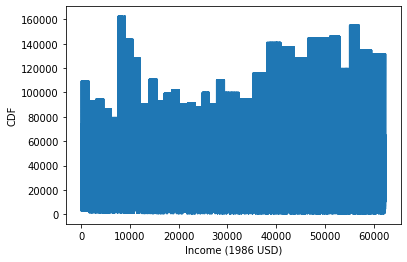

In [12]:
# Plot it
cdf_income.plot(kind = 'line')

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.show()

In [6]:
# Calculate the 75th percentile 
percentile_75th = cdf_income.inverse(0.75)

In [7]:
# Calculate the 75th percentile 
percentile_75th = cdf_income.inverse(0.75)

# Calculate the 25th percentile
percentile_25th = cdf_income.inverse(0.25)

# Calculate the interquartile range
iqr = percentile_75th - percentile_25th

# Print the interquartile range
print(iqr)

0.0


---

## Comparing Distributions

#### Creating Boolean Series

**_(1 = True)_ for male respondents**

In [14]:
# 1st step
male = gss.sex == 1

In [15]:
# 2nd step
# Extracting Age column

age = gss['age'] # gss.age

In [17]:
# 3rd step
# Select ages for males
# Select ages for female

male_age = age[male]
female_age = age[~male] # ~ tilda sign is used for reverse

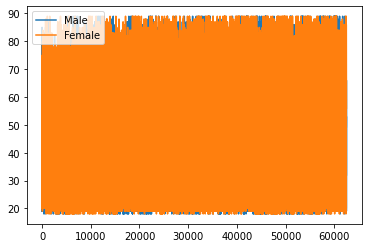

In [18]:
Pmf(male_age).plot(label = 'Male')
Pmf(female_age).plot(label = 'Female')
plt.legend()
plt.show()

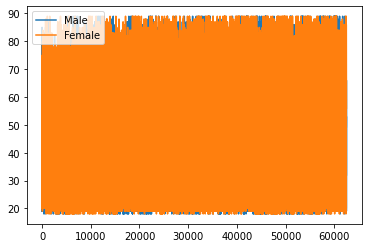

In [19]:
Cdf(male_age).plot(label = 'Male')
Cdf(female_age).plot(label = 'Female')
plt.legend()
plt.show()

#### Income Distribution

In [26]:
income = gss['realinc']
pre95 = gss['year'] < 1995 # Before year 1995
cd_pre95 = Cdf(income[pre95]).normalize()
cd_aft95 = Cdf(income[~pre95]).normalize()